In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#from statsmodels.stats.proportion import proportion_confint
#import pylab
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_1 = pd.read_csv('hcmv-263hxkx-1qhtfgz.txt')

In [3]:
len(data_1)

296

In [4]:
# from original data set, n = 296 (Palindromes), N = 229354 (Base pairs)
n, N = 296, 229354

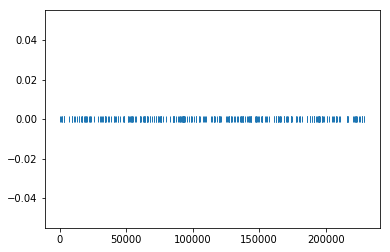

In [5]:
#'Location of Palindromes'
ar = np.arange(10) # just as an example array
plt.plot(data_1.location, np.zeros_like(data_1.location) + 0, '|')

In [6]:
#Gnerate 3 uniform distributed samples with the same size and bound as the data set.

In [7]:
samples = [np.random.uniform(0,N,n) for i in range(3)]

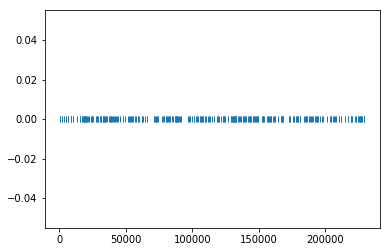

In [8]:
plt.plot(samples[0], np.zeros_like(data_1.location) + 0, '|')

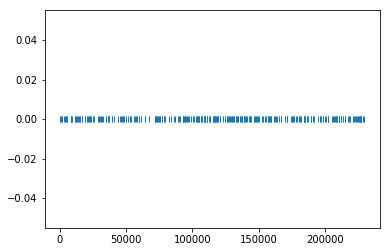

In [9]:
plt.plot(samples[1], np.zeros_like(data_1.location) + 0, '|')

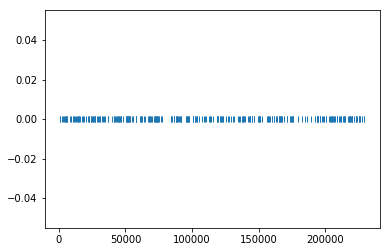

In [10]:
plt.plot(samples[2], np.zeros_like(data_1.location) + 0, '|')

In [11]:
# dot plot of locations

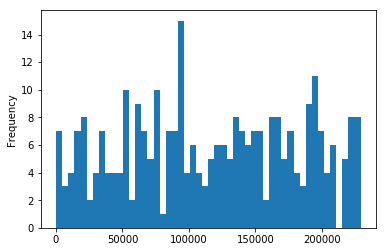

In [12]:
#histogram of locations of palindromes
data_1.location.plot(kind = 'hist', bins = 50)

In [13]:
#histogram of simulated data

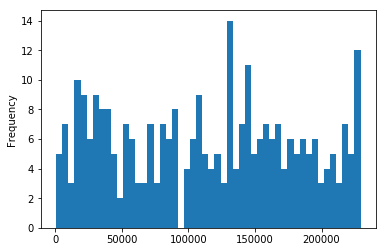

In [14]:
pd.Series(samples[0]).plot(kind = 'hist', bins = 50)

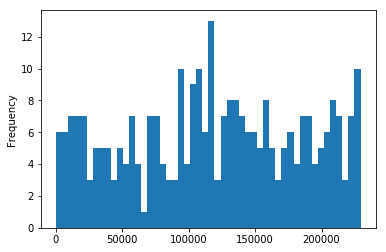

In [15]:
pd.Series(samples[1]).plot(kind = 'hist', bins = 50)

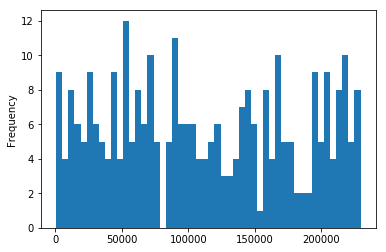

In [16]:
pd.Series(samples[2]).plot(kind = 'hist', bins = 50)

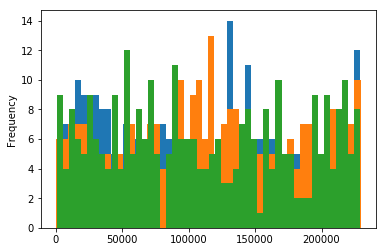

In [17]:
for i in samples:
    pd.Series(i).plot(kind = 'hist', bins = 50)

In [18]:
data_1 = data_1.assign(distance_from_previouse_palindrome\
                       = data_1.location.diff().set_value(0, np.NaN))

/Users/syeehyn/anaconda3/envs/UCSD/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [19]:
#Spacing between Consecutive Palindromes

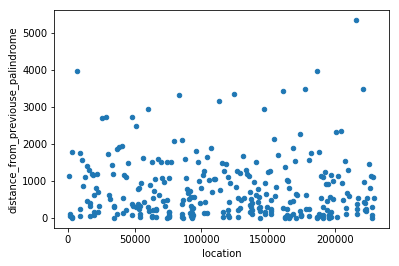

In [20]:
data_1.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')

In [21]:
# Spacing between Consecutive Palindromes w/ simulated data

In [22]:
df_lst = []
for i in samples:
    df_lst += [
        pd.DataFrame(
                {
                    'location' : i[1:]
                }
        ).assign(distance_from_previouse_palindrome = pd.Series(np.diff(i), \
                                                    index = range(1, len(i)))\
                                                    .set_value(0, np.NaN))
    ]

/Users/syeehyn/anaconda3/envs/UCSD/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


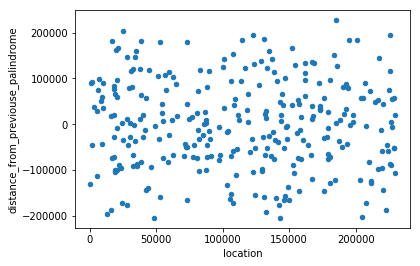

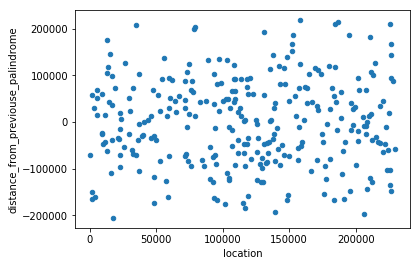

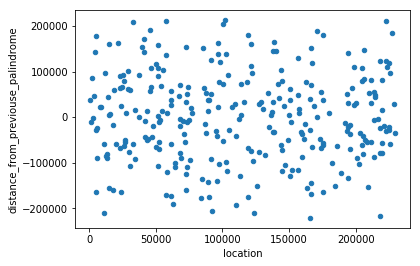

In [23]:
for i in df_lst:
    i.plot(kind = 'scatter', x = 'location', y = 'distance_from_previouse_palindrome')

In [24]:
# Histogram of counts of palindromes in non-overlapping regions in original data and uniform scatter with range 10000

In [1]:
pd.cut(data_1.location, range(0, N+1, 2500)).value_counts()#.to_frame().head(10)

NameError: name 'pd' is not defined

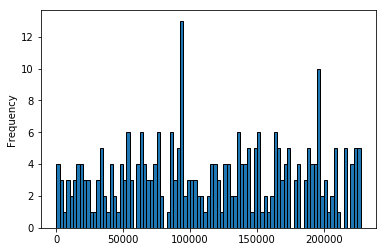

In [26]:
data_1.location.plot(kind = 'hist', bins = range(0, N+1, 2500),edgecolor="k")

In [27]:
# compare with in simulated data

In [67]:
df = []
counter = 1
for i in samples:
    df += [pd.Series(pd.cut(i, range(0, N+1, 20000)), name = 'location of simulated data ({})'.format(counter))\
           .apply(lambda x: int(x.left / 20000)).value_counts().to_frame()]
    counter += 1
table = pd.cut(data_1.location, range(0, N+1, 20000)).apply(lambda x: int(x.left / 20000)).value_counts().to_frame().T
for i in df:
    table = table.append(i.T)
table = table.T.sort_values(by = 'location', ascending = False)
#table.plot(kind = 'bar')

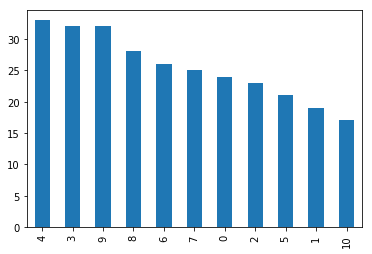

In [68]:
table.location.plot(kind = 'bar')

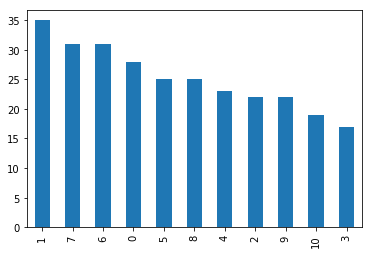

In [69]:
table['location of simulated data (1)'].sort_values(ascending = False).plot(kind = 'bar')

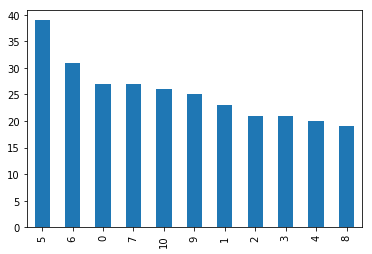

In [70]:
table['location of simulated data (2)'].sort_values(ascending = False).plot(kind = 'bar')

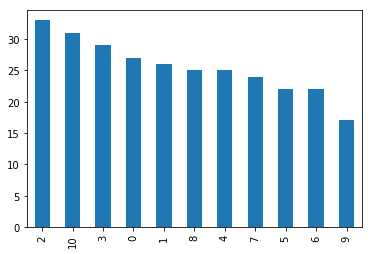

In [71]:
table['location of simulated data (3)'].sort_values(ascending = False).plot(kind = 'bar')

# Scenario 2: Location & Spacing

In [47]:
# bins = 35

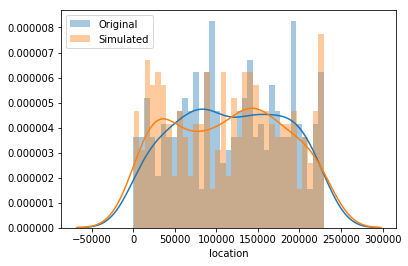

In [72]:
sns.distplot(data_1.location, bins = 35, label = 'Original')
sns.distplot(pd.Series(samples[0]), bins = 35, label = 'Simulated')
plt.legend()

In [50]:
sns.residplot(data_1.location)

TypeError: residplot() missing 1 required positional argument: 'y'

In [51]:
data_1

,location,distance_from_previouse_palindrome
0,177,NaN
1,1321,1144.0
2,1433,112.0
3,1477,44.0
4,3248,1771.0
5,3255,7.0
6,3286,31.0
7,7263,3977.0
8,9023,1760.0
9,9084,61.0
